# Conhecendo a base de dados

## Importando os dados


In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/KelvynAmaral/jornada_pandas/refs/heads/main/datasets/Imobiliaria.csv'

dados = pd.read_csv(url, sep=',', encoding='utf-8')

In [3]:
dados.head(2)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN


In [4]:
dados.tail(2)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN
32959,Conjunto Comercial/Sala,Centro,0,0,0,250,6500.0,4206.0,1109.0


In [5]:
type(dados)

pandas.core.frame.DataFrame

## Características gerais da base de dados

Explorando a dimensão do data frame - linhas e colunas

In [6]:
dados.shape

(32960, 9)

In [7]:
dados.columns

Index(['Tipo', 'Bairro', 'Quartos', 'Vagas', 'Suites', 'Area', 'Valor',
       'Condominio', 'IPTU'],
      dtype='object')

Verificando os tipos de dados dentro das colunas

In [8]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


Filtrando pela coluna `Tipo`, o pandas retorna uma `Series`, uma estrutura simples composta de índice no lado esquerdo e valores no lado direito. No caso, o dado `object` da coluna é uma string.

In [9]:
dados['Tipo']

0                      Quitinete
1                           Casa
2        Conjunto Comercial/Sala
3                    Apartamento
4                    Apartamento
                  ...           
32955                  Quitinete
32956                Apartamento
32957                Apartamento
32958                Apartamento
32959    Conjunto Comercial/Sala
Name: Tipo, Length: 32960, dtype: object

In [10]:
dados[['Valor', 'Quartos']]

,Valor,Quartos
0,1700.0,1
1,7000.0,2
2,5200.0,0
3,800.0,1
4,800.0,1
...,...,...
32955,800.0,0
32956,1800.0,3
32957,1400.0,2
32958,3000.0,2


# Análise exploratória de dados

## Qual o valor médio de aluguel por tipo de imóvel?

In [11]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


Calculando media de valor dos imoveis

In [12]:
dados['Valor'].mean()

12952.659715265761

In [13]:
dados.groupby('Tipo').mean(numeric_only=True)

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
Tipo,,,,,,,
Apartamento,2.481569,1.232388,0.875998,119.790498,4744.614648,1722.653697,686.170413
Box/Garagem,0.060976,1.304878,0.000000,17.524390,1899.756098,305.450000,125.846154
Casa,3.133402,1.795243,1.258532,250.578077,6793.454922,931.280952,1582.506394
Casa Comercial,1.562264,2.203774,0.260377,372.241509,14478.264151,1935.709677,1707.386740
Casa de Condomínio,4.007028,3.101406,2.864458,456.161647,11952.061245,1342.025527,3252.517730
Casa de Vila,1.927711,0.389558,0.228916,78.469880,1574.369478,138.768421,183.878788
Chácara,3.000000,0.000000,0.000000,0.000000,4900.000000,NaN,NaN
Conjunto Comercial/Sala,0.040939,2.516801,0.010858,214.472487,14715.045521,4512.218100,1399.596571
Flat,1.415966,0.962185,0.754202,65.483193,4546.189076,2027.720554,493.166667


Usando a função round para que possamos ter um número float com duas casas decimais

In [14]:
dados.groupby('Tipo')[['Valor']].mean().sort_values('Valor').round(2)

,Valor
Tipo,
Quitinete,1246.84
Pousada/Chalé,1480.00
Casa de Vila,1574.37
Box/Garagem,1899.76
Studio,2400.00
Loft,2557.88
Flat,4546.19
Apartamento,4744.61
Chácara,4900.00


In [15]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Tipo do imóvel')

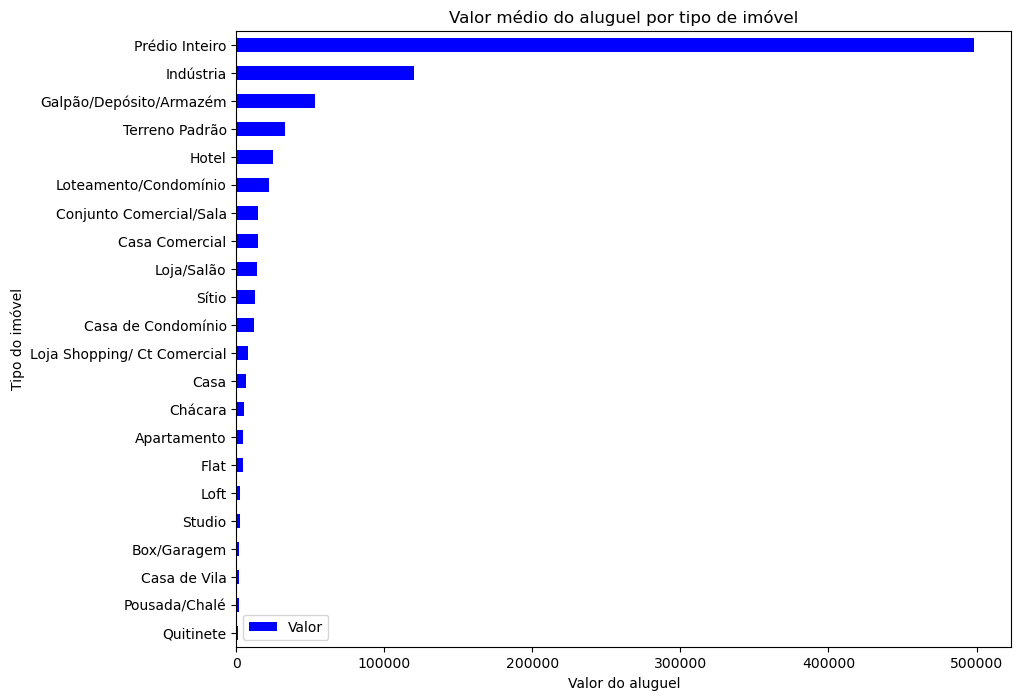

In [16]:
df_preco_tipo = dados.groupby('Tipo')[['Valor']].mean().sort_values('Valor').round(2)
df_preco_tipo.plot(kind='barh', figsize= (10,8), color='blue')
plt.title('Valor médio do aluguel por tipo de imóvel')
plt.xlabel('Valor do aluguel')
plt.ylabel('Tipo do imóvel')

## Removendo os imóveis comerciais

In [17]:
dados.Tipo.unique()

array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

In [18]:
imoveis_comercias = ['Conjunto Comercial/Sala',
                    'Prédio Inteiro', 'Loja/Salão',
                    'Galpão/Depósito/Armazém', 'Casa Comercial', 
                    'Terreno Padrão', 'Box/Garagem',
                    'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
                    'Sítio', 'Pousada/Chalé','Hotel', 'Indústria']
                     

In [ ]:
dados.query('Tipo in @imoveis_comercias')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0
16,Prédio Inteiro,Botafogo,0,0,0,536,28000.0,NaN,3563.0
26,Conjunto Comercial/Sala,São Cristóvão,0,1,0,25,1100.0,600.0,NaN
29,Loja/Salão,Campo Grande,0,1,0,35,1300.0,950.0,NaN
...,...,...,...,...,...,...,...,...,...
32942,Conjunto Comercial/Sala,Barra da Tijuca,0,1,0,55,2000.0,1096.0,NaN
32946,Conjunto Comercial/Sala,Centro,0,0,0,140,4000.0,1412.0,496.0
32948,Conjunto Comercial/Sala,Centro,0,0,0,32,600.0,1035.0,83.0
32954,Box/Garagem,Centro,0,0,0,755,14000.0,NaN,NaN


In [24]:
comerciais = dados.query('Tipo in @imoveis_comercias')

In [20]:
dados.query('Tipo not in @imoveis_comercias')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [21]:
df = dados.query('Tipo not in @imoveis_comercias')

In [22]:
df.Tipo.unique()

array(['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Flat',
       'Casa de Vila', 'Loft', 'Studio'], dtype=object)

Text(0, 0.5, 'Tipo do imóvel')

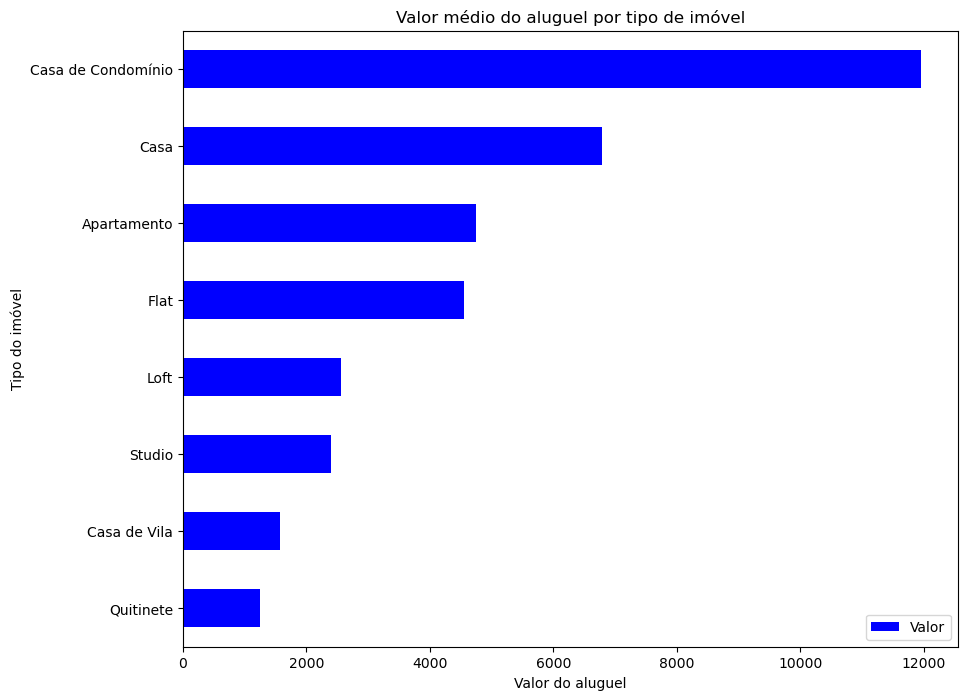

In [23]:
df_preco_tipo = df.groupby('Tipo')[['Valor']].mean().sort_values('Valor').round(2)
df_preco_tipo.plot(kind='barh', figsize= (10,8), color='blue')
plt.title('Valor médio do aluguel por tipo de imóvel')
plt.xlabel('Valor do aluguel')
plt.ylabel('Tipo do imóvel')

## Qual o percentual de cada tipo de imóvel na nossa base de dados?

### **Selecionando apenas os imóveis do tipo apartamento**

# Tratando e filtrando os dados

## Lidando com dados nulos

## Removendo registros

## Filtros

### **1. Apartamentos que possuem `1 quarto` e `aluguel menor que 1200`**



### **2. `Apartamentos` que possuem pelo menos `2 quartos`, `aluguel menor que 3000` e `area maior que 70`**

## Salvando os dados

# Manipulando os dados

## Criando colunas numéricas

## Criando colunas categóricas